## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

## 參考解答

In [1]:
from sklearn.datasets import load_boston, load_wine
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df1.columns.values

NameError: name 'df1' is not defined

In [2]:
# 簡單回歸 Y=aX+b
# 多元
# 讀取 Boston 資料
boston = load_boston()
# print(type(boston))
df1 = pd.DataFrame(boston.data, columns = boston.feature_names)
df1['target'] = pd.Series(boston.target)
x1 = df1.drop(['target'], axis = 1)
y1 = df1[['target']]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=4)

# 切分訓練集/測試集
# x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)
# Normal
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
sc.fit(x1_train)
x1_train_nor=sc.transform(x1_train)
x1_test_nor=sc.transform(x1_test)
# x1_train_nor[0:12]

# 建立一個線性回歸模型
regr1 = LinearRegression()

# 將訓練資料丟進去模型訓練
regr1.fit(x1_train_nor, y1_train)

# 將測試資料丟進模型得到預測結果
y1_pred = regr1.predict(x1_test_nor)

y=ax+b的 a係數: [[-1.22569795e-01  5.56776996e-02 -8.83428230e-03  4.69344849e+00
  -1.44357828e+01  3.28008033e+00 -3.44778157e-03 -1.55214419e+00
   3.26249618e-01 -1.40665500e-02 -8.03274915e-01  9.35368715e-03
  -5.23477529e-01]]
y=ax+b的 b截距: [36.35704138]
R平方 0.7465991966746854


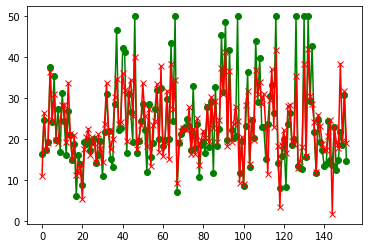

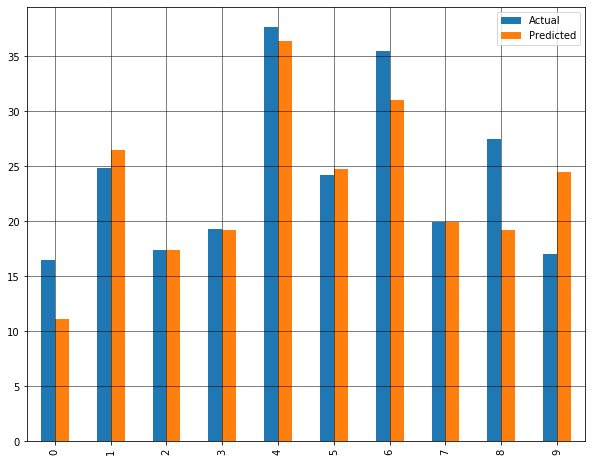

In [6]:
r_squared1 = regr1.score(x1_train, y1_train)
print('y=ax+b的 a係數:',regr1.coef_)
print('y=ax+b的 b截距:',regr1.intercept_ )
print('R平方',r_squared1)
# plt.scatter(x1_test, y1_test, color='blue', marker='x')
plt.plot(range(len(x1_test)), y1_test, color='green', marker = 'o')
plt.plot(range(len(x1_test)), y1_pred, color='red', marker = 'x')
df00 = pd.DataFrame({'Actual': np.array(y1_test)[0:10].flatten(), 'Predicted': np.array(y1_pred)[0:10].flatten()})
df00.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()

In [4]:
print("Mean squared error: %.2f"
      % mean_squared_error(y1_test, y1_pred))

Mean squared error: 90.64


In [12]:
# 多變項回歸 y=aX1 +bX2 +C
# 讀取 wine 資料
wine = load_wine()
df2 = pd.DataFrame(wine.data, columns = wine.feature_names)

# 切分訓練集/測試集
x2_train, x2_test, y2_train, y2_test = train_test_split(wine.data, wine.target, test_size=0.3)

# 標準化: 為了避免偏向某個變數去做訓練
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
sc.fit(x2_train)
x2_train_nor=sc.transform(x2_train)
x2_test_nor=sc.transform(x2_test)
x2_train_nor[0:10]

# # 建立一個羅吉斯回歸模型
# regr = LogisticRegression()
# 建立一個線性回歸模型
regr2 = LinearRegression()

# 將訓練資料丟進去模型訓練
regr2.fit(x2_train_nor, y2_train)

# 將測試資料丟進模型得到預測結果
y2_pred = regr2.predict(x2_test_nor)

y=aX1+bX2+c的 a、b係數: [-0.10689626  0.03429569 -0.07080421  0.15601487 -0.0022414   0.10343491
 -0.3618098  -0.03285009  0.04438852  0.15499809 -0.05878296 -0.22117811
 -0.19448703]
y=aX1+bX2+c的 c截距: 0.9919354838709679
R平方 0.8985217434048794


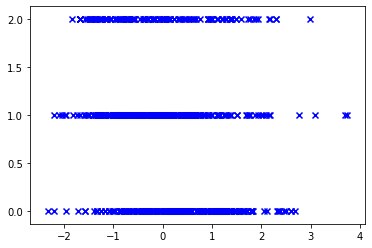

In [17]:
r_squared2 = regr2.score(x2_train_nor, y2_train)
print('y=aX1+bX2+c的 a、b係數:', regr2.coef_)
print('y=aX1+bX2+c的 c截距:', regr2.intercept_ )
print('R平方',r_squared2)
for j in range(13):
    plt.scatter(x2_test_nor[:,j], y2_test, color='blue', marker='x')
    # plt.plot(x2_test_nor[:,j], y2_pred, color='green')


In [9]:
print("Mean squared error: %.2f"
      % mean_squared_error(y2_test, y2_pred))
# acc = accuracy_score(y2_test, y2_pred)
# print("Accuracy: ", acc)

Mean squared error: 0.07
